In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
#from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!pip install konlpy

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ADV/RAW(일반 + 피싱) + TRAIN + TEST/raw.csv')

In [ ]:
aug = pd.read_csv('/content/drive/MyDrive/adv/data/aug.csv')

In [ ]:
total_data = pd.concat([data,aug],ignore_index = True)

In [ ]:
print(total_data.isnull().values.any())

True


In [ ]:
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=42)

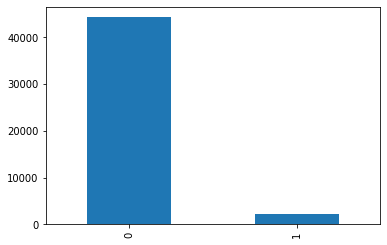

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  44283
1      1   2188


In [ ]:
train_data = train_data.dropna()
train_df = train_data.copy()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46420 entries, 28587 to 56422
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   txt     46420 non-null  object
 1   label   46420 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
train_df['txt'] = train_df['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_df['txt'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

<ipython-input-75-fbce5ea24231>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['txt'] = train_df['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


txt      0
label    0
dtype: int64


In [ ]:
test_df = test_data.copy()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11618 entries, 30943 to 34901
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   txt     11598 non-null  object
 1   label   11618 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 272.3+ KB


In [ ]:
test_df.drop_duplicates(subset='txt', inplace=True)
test_df['txt'] = test_df['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_df['txt'].replace('', np.nan, inplace=True)
test_df = test_df.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수: ', len(test_df))

전처리 후 테스트용 샘플의 개수:  11596


<ipython-input-59-96e2153da749>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['txt'] = test_df['txt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train_df=train_df.astype('string')

In [ ]:
train_df['tokenized'] = train_df['txt'].apply(mecab.morphs)
train_df['tokenized'] = train_df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
test_df['tokenized'] = test_df['txt'].apply(mecab.morphs)
test_df['tokenized'] = test_df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
normal_words = np.hstack(train_df[train_df.label == 0]['tokenized'].values)
pishing_words = np.hstack(train_df[train_df.label == 1]['tokenized'].values)

In [ ]:
normal_word_count = Counter(normal_words)
print(normal_word_count.most_common(30))

[('ㅇㅇㅇ', 108837), ('님', 107588), ('고객', 107529), ('요', 101917), ('확인', 101687), ('로', 80247), ('입니다', 78472), ('ㅇㅇㅇㅇ', 70959), ('감사합니다', 62705), ('해', 59008), ('으로', 55251), ('ㅇㅇ', 54207), ('아', 54055), ('말씀', 52432), ('카드', 52024), ('상품', 50840), ('주문', 46425), ('에서', 44119), ('알겠습니다', 42475), ('드리겠습니다', 40497), ('수', 36141), ('번호', 34577), ('됩니다', 33536), ('결제', 32140), ('하고', 31839), ('부탁', 31690), ('만', 31411), ('할', 31250), ('드릴', 30353), ('있습니다', 30231)]


In [ ]:
pishing_word_count = Counter(pishing_words)
print(pishing_word_count.most_common(30))

[('그', 16905), ('예', 14352), ('지금', 13799), ('본인', 12697), ('으로', 10609), ('요', 9997), ('저희', 9835), ('제', 9763), ('이제', 8983), ('로', 8032), ('님', 8029), ('에서', 7873), ('거', 7593), ('어', 7237), ('고객', 6886), ('통장', 6474), ('수', 6023), ('하고', 5245), ('서', 5055), ('확인', 5010), ('뭐', 4963), ('계좌', 4930), ('적', 4833), ('만', 4820), ('부분', 4816), ('일', 4779), ('좀', 4686), ('은행', 4519), ('안', 4431), ('말씀', 4380)]


In [ ]:
X_train = train_df['tokenized'].values
y_train = train_df['label'].apply(lambda x: 0 if x == 0 else 1)
X_test = test_df['tokenized'].values
y_test = test_df['label'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 75835
등장 빈도가 1번 이하인 희귀 단어의 수: 26103
단어 집합에서 희귀 단어의 비율: 34.42078196083603
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.3070851218593714


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기: ', vocab_size)

단어 집합의 크기:  49734


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 190
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 190 이하인 샘플의 비율: 67.16932356742782


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn)

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn)

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())

    # return a single tensor value
    return _f1score

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib

embedding_dim = 100
hidden_units = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

class_weight = {0: 0.1,
                1: 0.9}

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1score])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32,class_weight=class_weight, validation_split=0.2)

joblib.dump(model, '/content/drive/MyDrive/adv/lstm_model.pkl')

Epoch 1/10
1161/1161 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9906 - precision: 0.6796 - recall: 0.7146 - f1score: 0.6881
Epoch 1: val_accuracy improved from -inf to 0.99580, saving model to best_model4.h5
1161/1161 [==============================] - 278s 236ms/step - loss: 0.0091 - accuracy: 0.9906 - precision: 0.6796 - recall: 0.7146 - f1score: 0.6881 - val_loss: 0.0168 - val_accuracy: 0.9958 - val_precision: 0.7553 - val_recall: 0.7796 - val_f1score: 0.7619
Epoch 2/10
1161/1161 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9979 - precision: 0.7707 - recall: 0.7846 - f1score: 0.7751
Epoch 2: val_accuracy improved from 0.99580 to 0.99882, saving model to best_model4.h5
1161/1161 [==============================] - 277s 239ms/step - loss: 0.0013 - accuracy: 0.9979 - precision: 0.7707 - recall: 0.7846 - f1score: 0.7751 - val_loss: 0.0052 - val_accuracy: 0.9988 - val_precision: 0.7878 - val_recall: 0.7955 - val_f1score: 0.7901
Epoch

['/content/drive/MyDrive/adv/lstm_model.pkl']

In [ ]:
from tensorflow.keras.models import load_model

dependencies = {
    'precision': precision,
    'recall': recall,
    'f1score': f1score
}

loaded_model = load_model('best_model4.h5', custom_objects=dependencies)
# print('\n 테스트 정확도: %.4f' %(loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
_loss, _acc, _precision, _recall, _f1score = loaded_model.evaluate(X_test, y_test)

127/127 [==============================] - 1s 5ms/step - loss: 0.1483 - accuracy: 0.9626 - precision: 0.9723 - recall: 0.9584 - f1score: 0.9639


In [ ]:
def phishing_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 피싱입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 정상입니다.".format((1 - score) * 100))

In [ ]:
phishing_predict('안녕하세요 은행인데요 대출 관련 전화입니다 통화 가능하신가요 네')

1/1 [==============================] - 0s 496ms/step
99.98% 확률로 피싱입니다.
